In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

## Dealing with missing Data

### Missing data with numpy

In [9]:
x = np.array([1,2,3,4,5])
print(x.dtype)

int32


In [10]:
x = np.array([1,2,3,'--',5])
print(x.dtype)

<U11


In [11]:
x.sum() # error

TypeError: cannot perform reduce with flexible type

In [12]:
# we can use None for missing values but it will again give error for the sum() function
x = np.array([1,2,3,None,5])
print(sum(x)) # error

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [13]:
# addinf np.nan
x = np.array([1,2,3,np.nan,5])
print(x.sum()) # not correct answer

nan


In [14]:
# It will contain tTrue if we have a value at an index in x else Fale 
x_b = np.array([True,True,True,False,True])
x[x_b].sum()

11.0

In [15]:
# Using masked array
m_x = np.ma.masked_array(x, mask=[0,0,0,1,0])

In [16]:
m_x.sum()

11.0

### Missing values with Pandas

In [17]:
# .isnull() returns a boolean series with True where there is no value 

In [18]:
# missing_values = ['NA', 'n/a', 'na', 'N/A', 'Empty', '--']
# df = pd.read_csv('file_name', na_values = missing_values)

In [19]:
# df.fillna('value which needs to be filled where value is null', inplace = True)

In [20]:
# ffill - forwardfill (fill empty value with its previous value)
# df.fillna(method='ffill', inplace=True)
#                  OR
# df.fillna(method='pad', inplace=True)

# bfill - backwardfill (fill empty value with its next value)
# df.fillna(method='bfill', inplace=True)

In [36]:
# df.dropna(inplace=True) drop rows with null values

In [21]:
# df.column.interpolate(order = 1, inplace = True) 
# (convert into patern if it is their in the columns and fill the missing values)

In [ ]:
# df.reset_index(inplace=True) to reset index

# Open ended descriptive statistics

In [22]:
df = pd.read_excel('train.xlsx')

In [23]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [25]:
# Check for missing values
df.isnull().sum().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

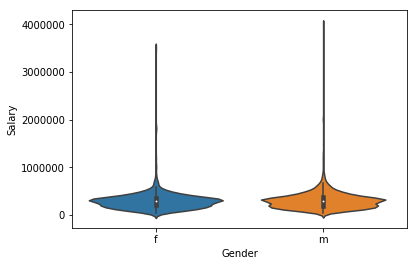

In [27]:
# Checking for any gender biased
sns.violinplot(x = 'Gender', y = 'Salary', data=df);

In [28]:
df[['10percentage','12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [29]:
df[['10percentage','12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [30]:
df[['Salary','Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [31]:
df[['Salary','Gender']].groupby('Gender').median()

,Salary
Gender,
f,300000
m,300000


In [32]:
th = df.Salary.mean()+df.Salary.std() # threshold for high income

In [33]:
df['HighIncome'] = df.Salary > th

In [34]:
df[['Salary','HighIncome', 'Gender']].groupby(['Gender', 'HighIncome']).mean()

Salary
Gender HighIncome               
f      False       271499.454744
       True        832250.000000
m      False       272598.433606
       True        785344.827586

In [35]:
df[['Salary','HighIncome', 'Gender']].groupby(['Gender', 'HighIncome']).count()

Salary
Gender HighIncome        
f      False          917
       True            40
m      False         2809
       True           232

# Plotly Library to plot interactive charts

In [39]:
import plotly_express as px

In [38]:
# px.scatterplot(df_, x="area", y = 'production', animation_frame='crop_year', animation_group='state_name', color='state_name')

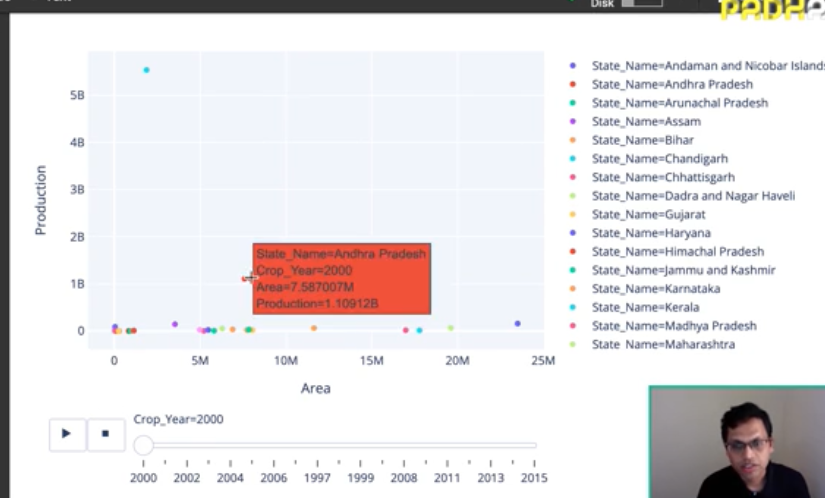

In [40]:
from IPython.display import Image
Image("Annotation 2020-08-18 234617.png")

In [ ]:
# df_.sort_values('Crop_year', inplace = True) # sorting year column